In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [40]:
def loadCsv(filename):
    
    df = pd.read_csv(filename)#load Dataset
    
    if(df.columns[0]=='Unnamed: 0'):
    
        df=df.iloc[:,1:]#only use the feature and Label Colloums 
    
    dataset = df.values.tolist()

    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [44]:
lines=loadCsv('ricsBigData.csv')
dataset=pd.DataFrame(lines)
#print(dataset.head())
data=dataset.iloc[:,:-1]
#print(data.head())
label=dataset.iloc[:,-1]
#print(data.head())

In [45]:
X_train,X_test,y_train,y_test =train_test_split(data,label,test_size=0.8,random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)



              precision    recall  f1-score   support

         0.0       0.36      0.65      0.46       189
         1.0       0.65      0.30      0.41       236
         2.0       0.59      0.53      0.56       219

    accuracy                           0.48       644
   macro avg       0.53      0.49      0.48       644
weighted avg       0.54      0.48      0.47       644

Confusion matrix, without normalization
[[122  19  48]
 [134  70  32]
 [ 84  19 116]]


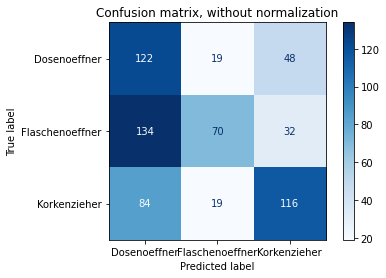

In [46]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2)
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]


disp = ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix, without normalization")

print("Confusion matrix, without normalization")
print(disp.confusion_matrix)